In [17]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import math as math

In [18]:
#For Mars only
R=249.23*10**9 #distance, in m/semimajor axis
T=31558118.4 #Time, second/sidereal yr
G=6.67408*10**(-11) #Grav constant
#Set G'=1 to get:
M=(R**3)/(G*(T**2))
MSun=1.989*10**30
MSunp=MSun/M
print(MSunp)

a=(227.98*10**9)/R #Semi-major axis
e=0.0934 #1233 #Eccentricity, by NASA
b=a*(1-e**2)**(1/2) #Semi-minor axis

x0=-1
y0=0
v0x=0
v0y=-21.97*((10**3)/R)*T #Min orbital vel x 1/R (in km) x T

8.539794916714262


In [62]:
M*R*R/(T*T)

1.4526660084509036e+37

In [19]:

def Euler(Tf,N):
    t=0
    x=x0
    y=y0
    vx=v0x
    vy=v0y
    h=Tf/N
    xpos=[]
    ypos=[]
    Energy=[]
    time=np.arange(0,Tf+h,h)
    while t<=Tf:
        #if t+h>T:
        #    t=T-h
        xpos.append(x)
        ypos.append(y)
        
        r=(x**2+y**2)**(1/2) 
        v=(vx**2+vy**2)**(1/2) 
        Energy.append((-MSunp/(r))+0.5*(v)**2)
        xn = x+vx*h #Evolve x and y
        yn = y+vy*h
        vxn=vx-h*MSunp*x/(r**3) #Evolve vx and vy
        vyn=vy-h*MSunp*y/(r**3)
        x=xn
        y=yn
        vx=vxn
        vy=vyn
        t+=h
        
    return xpos,ypos,time, Energy

In [20]:
x,y,t,EulerE=Euler(5,100000) #Sidereal Orbit for Mars is 1.881 times earth

In [21]:
plt.plot(x,y,'k-')
plt.plot(x[-1],y[-1],'bo')
plt.plot(x_exact,y_exact, 'r*')
plt.show()

NameError: name 'x_exact' is not defined

In [22]:
#Newton-Rapheson

def MM(tt):
    while tt>1.881:
        tt-=1.881
    return (2.0*math.pi/1.881)*tt-math.pi
    

def f(tt,EE):
    return EE-e*math.sin(EE)-MM(tt)
def fprime(EE):
    return 1.0-e*math.cos(EE)
def NR(time):
    EE=MM(time)
    for i in range(100000):
        Ep=EE-(f(time,EE)/fprime(EE))
        EE=Ep
        if abs(f(time,EE))<1e-10:
            #print(i)
            #print(E)
            break
    return a*(np.cos(EE)-e), b*np.sin(EE)

In [23]:
x_exact,y_exact=NR(5)
print(x_exact, y_exact)

0.348970759288 0.801487168329


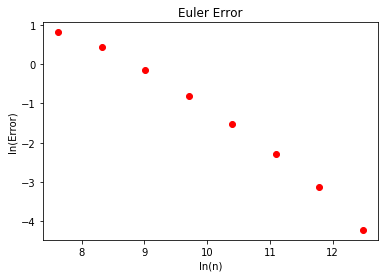

-0.90878951229


In [46]:
#Error for Euler
r_exact=(x_exact**2+y_exact**2)**(1/2)
EulerError=np.empty([8])
pts=np.empty([8])
for i in range(11,19):
    n=2**(i)
    x,y,t,Energy=Euler(5,n)
    r=(x[-1]**2+y[-1]**2)**(1/2)
    L1=(((x_exact-x[-1])**2+(y_exact-y[-1])**2)**(1/2))/r_exact
    EulerError[i-11]=np.log(L1)
    pts[i-11]=np.log(n)
    plt.plot(np.log(n),np.log(L1),'ro')
plt.title("Euler Error")
plt.xlabel("ln(n)")
plt.ylabel("ln(Error)")    
plt.show()
slope,intercept = np.polyfit(pts[:-2],EulerError[:-2], 1)
print(slope)

In [25]:

def Rk2(Tf,N):
    t=0
    x=x0
    y=y0
    vx=v0x
    vy=v0y
    h=Tf/N
    xpos=[]
    ypos=[]
    Energy=[]
    time=np.arange(0,Tf+h,h)
    while t<=Tf:
        
        xpos.append(x)
        ypos.append(y)
        r=(x**2+y**2)**(1/2) 
        v=(vx**2+vy**2)**(1/2) 
        Energy.append((-MSunp/(r))+0.5*(v)**2)
        
        x_half=x+(h/2)*vx
        y_half=y+(h/2)*vy
        r_half=(x_half**2+y_half**2)**(1/2) 
        
        k2x=h*(vx-(h/2)*(MSunp*x_half)/(r_half**3))
        k2y=h*(vy-(h/2)*(MSunp*y_half)/(r_half**3))
        
        xn = x+k2x #Evolve x and y
        yn = y+k2y
        
        k2x=h*MSunp*x_half/(r_half**3)
        k2y=h*MSunp*y_half/(r_half**3)
        
        vxn=vx-k2x #Evolve vx and vy
        vyn=vy-k2y
        
        x=xn
        y=yn
        vx=vxn
        vy=vyn
        t+=h
        
    return xpos,ypos,time, Energy

In [28]:
x,y,t,Rk2E=Rk2(5,1000)

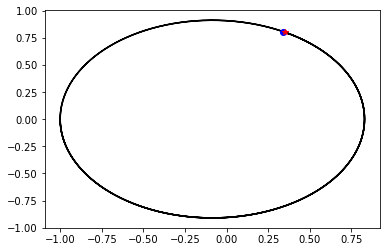

In [29]:
plt.plot(x,y,'k-')
plt.plot(x[-1],y[-1],'bo')
plt.plot(x_exact,y_exact, 'r*')
plt.show()

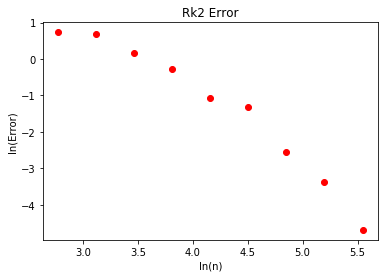

-1.93647589601


In [49]:
#Error for Rk2
r_exact=(x_exact**2+y_exact**2)**(1/2)
Rk2Error=np.empty([9])
pts=np.empty([9])
for i in range(8,17):
    n=2**(i/2)
    x,y,t,En=Rk2(5,n)
    r=(x[-1]**2+y[-1]**2)**(1/2)
    L1=(((x_exact-x[-1])**2 + (y_exact-y[-1])**2)**(1/2))/r_exact
    Rk2Error[i-9]=np.log(L1)
    pts[i-9]=np.log(n)
    plt.plot(np.log(n),np.log(L1),'ro')
plt.title("Rk2 Error")
plt.xlabel("ln(n)")
plt.ylabel("ln(Error)")    
plt.show()
slope,intercept = np.polyfit(pts,Rk2Error, 1)
print(slope)

In [26]:
def Rk4(Tf,N):
    t=0
    x=x0
    y=y0
    vx=v0x
    vy=v0y
    h=Tf/N
    xpos=[]
    ypos=[]
    Energy=[]
    time=np.arange(0,Tf+h,h)
    while t<=Tf:
        
        xpos.append(x)
        ypos.append(y)
        r=(x**2+y**2)**(1/2) 
        v=(vx**2+vy**2)**(1/2) 
        Energy.append((-MSunp/(r))+0.5*(v)**2)
        
        k1x=h*vx
        k1y=h*vy
        ###
        k1vx=-h*MSunp*x/((x**2+y**2)**(3/2)) 
        k1vy=-h*MSunp*y/((x**2+y**2)**(3/2)) 
        
        k2vx=-h*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
        k2vy=-h*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
        ###
        k2x=h*(vx-(h/2)*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
        k2y=h*(vy-(h/2)*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
        ###
        k3vx=-h*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
        k3vy=-h*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
        ###
        k3x=h*(vx-(h/2)*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
        k3y=h*(vy-(h/2)*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
        ###
        k4vx=-h*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
        k4vy=-h*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
        ###
        k4x=h*(vx-h*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))
        k4y=h*(vy-h*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))
        
       
        
        xn = x+(1/6)*(k1x+2*k2x+2*k3x+k4x) #Evolve x and y
        yn = y+(1/6)*(k2y+2*k2y+2*k3y+k4y)
        
       
        
        vxn=vx+(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx) #Evolve vx and vy
        vyn=vy+(1/6)*(k2vy+2*k2vy+2*k3vy+k4vy)
        
        x=xn
        y=yn
        vx=vxn
        vy=vyn
        t+=h
        
    return xpos,ypos,time,Energy

In [33]:
x,y,t,Rk4E=Rk4(5,100000)

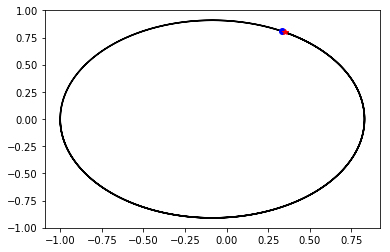

In [34]:

plt.plot(x,y,'k-')
plt.plot(x[-1],y[-1],'bo')
plt.plot(x_exact,y_exact, 'r*')
plt.show()

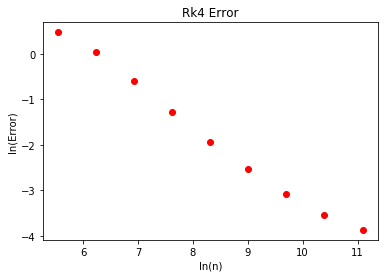

-0.825216731769


In [59]:
#Error for Rk4
r_exact=(x_exact**2+y_exact**2)**(1/2)
Rk4Error=np.empty([9])
pts=np.empty([9])
for i in range(8,17):
    n=2**i
    x,y,t,E=Rk4(5,n)
    r=(x[-1]**2+y[-1]**2)**(1/2)
    L1=(((x_exact-x[-2])**2 + (y_exact-y[-2])**2)**(1/2))
    Rk4Error[i-8]=np.log(L1)
    pts[i-8]=np.log(n)
    plt.plot(np.log(n),np.log(L1),'ro')
plt.title("Rk4 Error")
plt.xlabel("ln(n)")
plt.ylabel("ln(Error)")
plt.show()
slope,intercept = np.polyfit(pts,Rk4Error, 1)
print(slope)

In [27]:
def Verlet(Tf,N):
    t=0
    x=x0
    y=y0
    
    
    h=Tf/N
    r=(x**2+y**2)**(1/2)
    #Get v at t+h/2
    vx_at_x=v0x
    vy_at_y=v0y
    vx=v0x-(h/2)*(MSunp*x)/(r**3)
    vy=v0y-(h/2)*(MSunp*y)/(r**3)
    xpos=[]
    ypos=[]
    Energy=[]
    Pot=[]
    KE=[]
    
    time=np.arange(0,Tf+h,h)
    while t<=Tf:
        
        xpos.append(x)
        ypos.append(y)
        
       
        r=(x**2+y**2)**(1/2)
        v=(vx_at_x**2+vy_at_y**2)**(1/2) 
        Energy.append((-MSunp/(r))+0.5*(v)**2)
        Pot.append((-MSunp/(r)))
        KE.append(0.5*(v**2))
        xn=x+h*vx #Evolve x and y
        yn=y+h*vy
        
        kx=-h*(MSunp*xn)/((xn**2+yn**2)**(3/2)) 
        ky=-h*(MSunp*yn)/((xn**2+yn**2)**(3/2)) 
        vx_at_x=vx+kx/2 #These are useful for energy calc
        vy_at_y=vy+ky/2
        
        vxn=vx+kx 
        vyn=vy+ky
        
        x=xn
        y=yn
        vx=vxn
        vy=vyn
        t+=h
        
    return xpos,ypos,time,Energy

In [62]:
for n in range(1,10000):
    x,y,t,VerletE=Verlet(5,n)
    if (((x_exact-x[-1])**2 + (y_exact-y[-1])**2)**(1/2))<0.001:
        print(n)
        break

1265


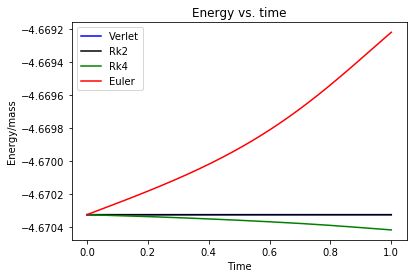

In [66]:
x,y,t,VerletE=Verlet(1,100000)
x,y,t,EulerE=Euler(1,100000)
x,y,t,Rk2E=Rk2(1,100000)
x,y,t,Rk4E=Rk4(1,100000)
#for i in range(len(t)):
#    t[i]=t[i]*T
plt.plot(t,VerletE,'b-',t,Rk2E,'k-',t,Rk4E,'g-',t,EulerE,'r-')
plt.title("Energy vs. time")
plt.ylabel("Energy/mass")
plt.xlabel("Time")
plt.legend(["Verlet","Rk2","Rk4","Euler"])
plt.show()

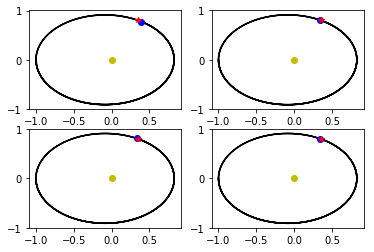

In [35]:
fig,axes=plt.subplots(2,2)
x,y,t,EulerE=Euler(5,100000)
axes[0,0].plot(x,y,'k-',x[-1],y[-1],'bo',x_exact,y_exact, 'r*',0,0,'yo')
x,y,t,Rk2E=Rk2(5,100000)
axes[0,1].plot(x,y,'k-',x[-1],y[-1],'bo',x_exact,y_exact, 'r*',0,0,'yo')
x,y,t,Rk4E=Rk4(5,100000)
axes[1,0].plot(x,y,'k-',x[-1],y[-1],'bo',x_exact,y_exact, 'r*',0,0,'yo')
x,y,t,VerletE=Verlet(5,100000)
axes[1,1].plot(x,y,'k-',x[-1],y[-1],'bo',x_exact,y_exact, 'r*',0,0,'yo')
plt.show()

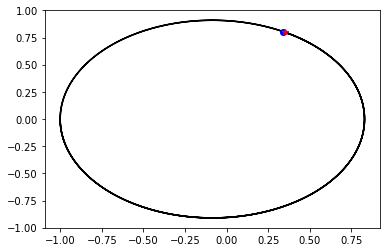

In [64]:
x,y,t,E=Verlet(5,12650)
plt.plot(x,y,'k-')
plt.plot(x[-1],y[-1],'bo')
plt.plot(x_exact,y_exact, 'r*')
plt.show()

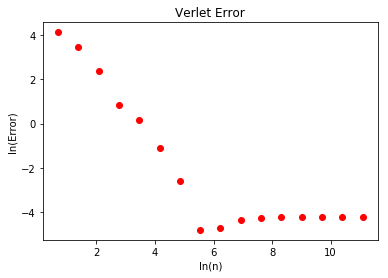

-1.78405408028


In [57]:
#Error for Verlet
r_exact=(x_exact**2+y_exact**2)**(1/2)
VerletError=np.empty([16])
pts=np.empty([16])
for i in range(1,17):
    n=2**i
    x,y,t,En=Verlet(5,n)
    r=(x[-1]**2+y[-1]**2)**(1/2)
    L1=(((x_exact-x[-1])**2 + (y_exact-y[-1])**2)**(1/2))/r_exact
    VerletError[i-1]=np.log(L1)
    pts[i-1]=np.log(n)
    plt.plot(np.log(n),np.log(L1),'ro')
plt.title("Verlet Error")
plt.xlabel("ln(n)")
plt.ylabel("ln(Error)")    
plt.show()
slope,intercept = np.polyfit(pts[:8],VerletError[:8], 1)
print(slope)

In [84]:
#Halley
R=5.24789*10**12 #distance, in m/aphelion
T=2376792201.6 #Time, second/sidereal yr (for Halley)
G=6.67408*10**(-11) #Grav constant
#Set G'=1 to get:
M=(R**3)/(G*(T**2))
MSun=1.989*10**30
MSunp=MSun/M
print(MSunp)

a=(2.66733*10**12)/R #Semi-major axis
e=0.967 #Eccentricity, by NASA
b=a*(1-e**2)**(1/2) #Semi-minor axis

x0=-1
y0=0
v0x=0
v0y=-1*((10**3)/R)*T
print(v0y)

5.188650867830126
-0.45290434852864675


In [85]:
def Rk4_ASS(Tf,sigma): #sigma is target accuracy/unit time
    t=0
    x=x0
    y=y0
    vx=v0x
    vy=v0y
    #h=Tf/N
    xpos=[]
    ypos=[]
    h=0.0001 #Initial step size, very small
    #time=np.arange(0,Tf,h)
    
    while t<=Tf:
        
        xpos.append(x)
        ypos.append(y)
        
        
        while True:
            x_store=x
            y_store=y
            vx_store=vx
            vy_store=vy
            for i in range(2): #Run twice, with step size h
                k1x=h*vx
                k1y=h*vy
                ###
                k1vx=-h*MSunp*x/((x**2+y**2)**(3/2)) 
                k1vy=-h*MSunp*y/((x**2+y**2)**(3/2)) 

                k2vx=-h*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
                k2vy=-h*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
                ###
                k2x=h*(vx-(h/2)*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
                k2y=h*(vy-(h/2)*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
                ###
                k3vx=-h*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
                k3vy=-h*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
                ###
                k3x=h*(vx-(h/2)*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
                k3y=h*(vy-(h/2)*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
                ###
                k4vx=-h*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
                k4vy=-h*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
                ###
                k4x=h*(vx-h*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))
                k4y=h*(vy-h*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))



                xn = x+(1/6)*(k1x+2*k2x+2*k3x+k4x) #Evolve x and y
                yn = y+(1/6)*(k2y+2*k2y+2*k3y+k4y)

                vxn=vx+(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx) #Evolve vx and vy
                vyn=vy+(1/6)*(k2vy+2*k2vy+2*k3vy+k4vy)
                x=xn
                y=yn
                vx=vxn
                vy=vyn
                if i==0:
                    x_use=xn
                    y_use=yn
                    vx_use=vxn
                    vy_use=vyn
            x1=x
            y1=y
            vx1=vx
            vy1=vy
            x=x_store
            y=y_store
            vx=vx_store
            vy=vy_store
            hp=2*h #Run for duble step size
            
            
            k1x=hp*vx
            k1y=hp*vy
            ###
            k1vx=-hp*MSunp*x/((x**2+y**2)**(3/2)) 
            k1vy=-hp*MSunp*y/((x**2+y**2)**(3/2)) 

            k2vx=-hp*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
            k2vy=-hp*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
            ###
            k2x=hp*(vx-(hp/2)*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
            k2y=hp*(vy-(hp/2)*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
            ###
            k3vx=-hp*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
            k3vy=-hp*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
            ###
            k3x=hp*(vx-(hp/2)*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
            k3y=hp*(vy-(hp/2)*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
            ###
            k4vx=-hp*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
            k4vy=-hp*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
            ###
            k4x=hp*(vx-hp*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))
            k4y=hp*(vy-hp*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))



            xn = x+(1/6)*(k1x+2*k2x+2*k3x+k4x) #Evolve x and y
            yn = y+(1/6)*(k2y+2*k2y+2*k3y+k4y)

            vxn=vx+(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx) #Evolve vx and vy
            vyn=vy+(1/6)*(k2vy+2*k2vy+2*k3vy+k4vy)
            x2=xn
            y2=yn
            
            rho=h*sigma*30/(abs(x1-x2))
            if rho>1: #Good step
                h=h*rho**(1/4)
                xn=x_use
                yn=y_use
                vxn=vx_use
                vyn=vy_use
                break
            else:
                h=h*rho**(1/4)
                k1x=h*vx
                k1y=h*vy
                ###
                k1vx=-h*MSunp*x/((x**2+y**2)**(3/2)) 
                k1vy=-h*MSunp*y/((x**2+y**2)**(3/2)) 

                k2vx=-h*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
                k2vy=-h*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2))
                ###
                k2x=h*(vx-(h/2)*(MSunp*(x+k1x/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
                k2y=h*(vy-(h/2)*(MSunp*(y+k1y/2))/(((x+k1x/2)**2+(y+k1y/2)**2)**(3/2)))
                ###
                k3vx=-h*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
                k3vy=-h*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2))
                ###
                k3x=h*(vx-(h/2)*(MSunp*(x+k2x/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
                k3y=h*(vy-(h/2)*(MSunp*(y+k2y/2))/(((x+k2x/2)**2+(y+k2y/2)**2)**(3/2)))
                ###
                k4vx=-h*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
                k4vy=-h*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2))
                ###
                k4x=h*(vx-h*(MSunp*(x+k3x))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))
                k4y=h*(vy-h*(MSunp*(y+k3y))/(((x+k3x)**2+(y+k3y)**2)**(3/2)))



                xn = x+(1/6)*(k1x+2*k2x+2*k3x+k4x) #Evolve x and y
                yn = y+(1/6)*(k2y+2*k2y+2*k3y+k4y)

                vxn=vx+(1/6)*(k1vx+2*k2vx+2*k3vx+k4vx) #Evolve vx and vy
                vyn=vy+(1/6)*(k2vy+2*k2vy+2*k3vy+k4vy)
                break
        x=xn
        y=yn
        vx=vxn
        vy=vyn
        t+=h
        
    return xpos,ypos

In [86]:
def M(t):
    #while t>1.881:
    #    t-=1.881
    return (2.0*math.pi/1)*t-math.pi
    

def f(t,E):
    
    return E-e*np.sin(E)-M(t)
def fprime(E):
    
    return 1.0-e*np.cos(E)
time=1
E=M(time)
for i in range(100000):
    Ep=E-(f(time,E)/fprime(E))
    E=Ep
    if f(time,E)==0:
        print(i)
        break
x_exact=a*(np.cos(E)-e)
y_exact=b*np.sin(E)

0


In [87]:
from time import time
time()

1508548287.6277275

In [91]:
start=time()
x,y=Rk4_ASS(1,0.0000001)
stop=time()
print(stop-start)

1.003913164138794


In [103]:
start=time()
x,y,t,VerletE=Verlet(1,1000000)
stop=time()
print(stop-start)

5.739411115646362


In [104]:
x[-1]-x_exact

-0.00017679470724707436

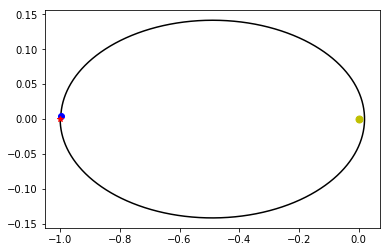

In [498]:
plt.plot(x,y,'k-')
plt.plot(x[-1],y[-1],'bo')
plt.plot(x_exact,y_exact, 'r*')
plt.plot(0,0, 'yo',markersize='7')
plt.show()

In [77]:
#For Mars only
R=249.23*10**9 #distance, in m/semimajor axis
T=31558118.4 #Time, second/sidereal yr
G=6.67408*10**(-11) #Grav constant
#Set G'=1 to get:
M=(R**3)/(G*(T**2))
MSun=1.989*10**30
MSunp=MSun/M
print(MSunp)

a=(227.98*10**9)/R #Semi-major axis
e=0.0934 #1233 #Eccentricity, by NASA
b=a*(1-e**2)**(1/2) #Semi-minor axis

x0=-1
y0=0
v0x=0
v0y=-21.97*((10**3)/R)*T #Min orbital vel x 1/R (in km) x T

8.539794916714262


In [78]:
def MeanAnom(time):
    while time>1.881: #For Mars only
        time-=1.881
    return (2.0*math.pi/1.881)*time-math.pi
    
def f(time,EcAn):
    return EcAn-e*math.sin(EcAn)-MeanAnom(time)
def fprime(EcAn):
    return 1.0-e*math.cos(EcAn)


In [153]:
def NR():
    time=5
    E=MeanAnom(5)
    for i in range(100000):
        Ep=E-(f(time,E)/fprime(E))
        E=Ep
        if abs(f(time,E))<1e-15:
            #print(i)
            #print(E)
            break
    return E, i
def Relax():
    time=5
    E=1
    for i in range(100000):
        Ep=e*math.sin(E)+MeanAnom(time)
        if abs(E-Ep)<1e-15:
            break
        E=Ep
    return E,i
def Bisect():
    #Use 1 and 2 as starting pts
    a=1
    b=2
    fa=f(5,a)
    fb=f(5,b)
    for i in range(100000):
        c=(b+a)/2
        fc=f(5,c)
        if abs(fc)<1e-15:
            return c,i
        elif fc<0:
            a=c
        else:
            b=c
def Secant():
    a=1
    b=2
    
    for i in range(100000):
        fa=f(5,a)
        fb=f(5,b)
        c=b-fb*(b-a)/(fb-fa)
        fc=f(5,c)
        if abs(fc)<1e-15:
            return c,i
        else:
            a=b
            b=c
        

In [154]:
NR()

(1.0759478620028082, 2)

In [155]:
Relax()

(1.075947862002808, 11)

In [156]:
Bisect()

(1.075947862002808, 48)

In [157]:
Secant()

(1.0759478620028082, 4)

In [105]:
#For S2
a=(1.425e+14) #Semi-major axis
e=0.8760 #1233 #Eccentricity, by Wiki
b=a*(1-e**2)**(1/2) #Semi-minor axis


R=(1+e)*a #distance, in m/perihelion
T=4.907e+8 #Time, second/sidereal yr
G=(6.67408*10**(-11)) #Grav constant
c=(3.0e+8)
MSun=(1.988e+30) #Sun mass, in kg
MBH=(4e+6)*MSun #BH mass, in kg



x0=-R
y0=0
v0x=0
v0y=-((G*MBH/a)*(1-e)/(1+e))**(1/2)
print(v0y)

-496159.0109085865


In [122]:
def S2Verlet(Tf,N):
    t=0
    x=x0
    y=y0
    
    
    h=Tf/N
    r=(x**2+y**2)**(1/2)
    #Get v at t+h/2
    vx=v0x-(h/2)*(G*MBH*x)/((r**3))
    vy=v0y-(h/2)*(G*MBH*y)/((r**3))
    xpos=[]
    ypos=[]
    
    time=np.arange(0,Tf+h,h)
    while t<=Tf:
        
        xpos.append(x)
        ypos.append(y)

        xn=x+h*vx #Evolve x and y
        yn=y+h*vy
        r=(xn**2+yn**2)**(1/2)
        kx=-h*(G*MBH*xn)/((r**3))
        ky=-h*(G*MBH*yn)/((r**3))
       
        
        vxn=vx+kx 
        vyn=vy+ky
        
        x=xn
        y=yn
        vx=vxn
        vy=vyn
        t+=h
        
    return xpos,ypos,time

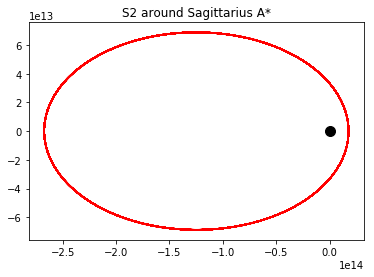

In [124]:
x,y,t=S2Verlet(50*T,1000000)
plt.plot(x,y,'r-')
#plt.plot(x[-1],y[-1],'bo')
plt.plot(0,0,'ko',markersize='10')
plt.title("S2 around Sagittarius A*")
plt.show()

In [121]:
print(x[-1],y[-1])

-253082521083950.28 48609598170044.05


In [119]:
R

267329999999999.97